# 🧪 Classification & Clustering Lab
## KNN, SVM, K-Means and Evaluation Metrics

---

**Course**: Machine Learning & AI — LUISS Guido Carli

**Objective**: Learn to implement and compare supervised classifiers (KNN, SVM) and unsupervised clustering (K-Means), and evaluate them using appropriate metrics.

**Dataset**: [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) — 150 samples of iris flowers, 4 numerical features, 3 species.

| Feature | Description |
|---------|-------------|
| `sepal length (cm)` | Length of the sepal |
| `sepal width (cm)` | Width of the sepal |
| `petal length (cm)` | Length of the petal |
| `petal width (cm)` | Width of the petal |
| `species` | Target: setosa (0), versicolor (1), virginica (2) |

**What you will learn**:
- How K-Nearest Neighbors works and how to tune K
- How Support Vector Machines find optimal decision boundaries
- How K-Means discovers clusters without labels
- How to evaluate models with precision, recall, F1-score, confusion matrix, silhouette score

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/800px-Iris_versicolor_3.jpg" width="350" alt="Iris flower">

*Image: Iris versicolor — one of the three species in the dataset (Wikimedia Commons)*

---

## 📋 Instructions

- Complete each **Task** by writing code in the empty cells below
- Read the theory sections carefully before attempting each task
- Run cells in order — later tasks depend on earlier results
- If you are stuck, refer to the scikit-learn documentation: [https://scikit-learn.org](https://scikit-learn.org/stable/)
- At the end, you will compare all models and discuss the results

---

## 📦 Part 0: Setup and Data Loading

### Theory: The Iris Dataset

The **Iris dataset** is one of the most famous datasets in machine learning, introduced by statistician **Ronald Fisher** in 1936.

It contains measurements of **150 iris flowers** from three species:

| Species | Samples | Separability |
|---------|---------|--------------|
| Setosa | 50 | Easily separable from the others |
| Versicolor | 50 | Overlaps with Virginica |
| Virginica | 50 | Overlaps with Versicolor |

Each sample has **4 numerical features**: sepal length, sepal width, petal length, and petal width (all in centimeters).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="220" style="display:inline"> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg" width="220" style="display:inline"> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg" width="220" style="display:inline">

*Left to right: Iris setosa, Iris versicolor, Iris virginica (Wikimedia Commons)*

### ✏️ Task 0.1: Import Libraries and Load Data

Import the following libraries and load the Iris dataset:
- `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`
- `load_iris` from `sklearn.datasets`

Create a DataFrame with the iris features and add columns for the numeric species label and the species name.

Print the **shape**, the **feature names**, the **class names**, and the **count of samples per class**.

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"Dataset shape: {df.shape}")
print(f"\nFeatures: {iris.feature_names}")
print(f"\nClasses: {list(iris.target_names)}")
print(f"\nSamples per class:")
print(df['species_name'].value_counts())
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (150, 6)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

Samples per class:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### ✏️ Task 0.2: Visualize the Data

Create a figure with **two scatter plots side by side**:

1. **Left plot**: Petal length vs petal width, colored by species
2. **Right plot**: Sepal length vs sepal width, colored by species

Add axis labels, a title, and a legend to each plot.

> **Question**: Which pair of features separates the classes better? Why?

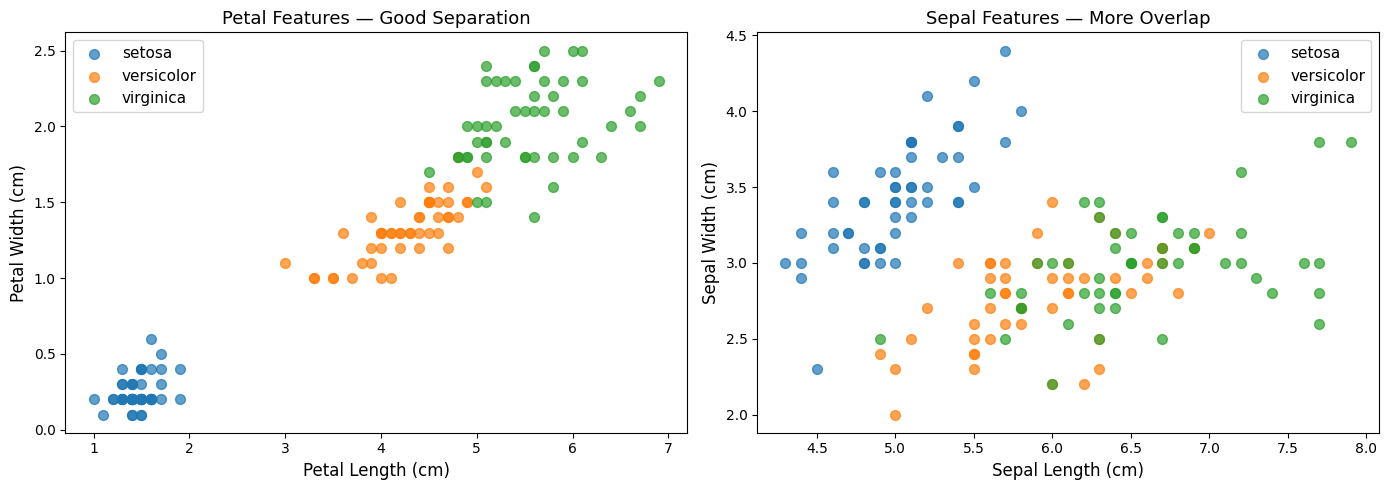

In [25]:
# YOUR CODE HERE

# Scatter: petal vs sepal features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for species in df['species_name'].unique():
    subset = df[df['species_name'] == species]
    axes[0].scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species, alpha=0.7, s=50)
axes[0].set_xlabel('Petal Length (cm)', fontsize=12)
axes[0].set_ylabel('Petal Width (cm)', fontsize=12)
axes[0].set_title('Petal Features — Good Separation', fontsize=13)
axes[0].legend(fontsize=11)

for species in df['species_name'].unique():
    subset = df[df['species_name'] == species]
    axes[1].scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species, alpha=0.7, s=50)
axes[1].set_xlabel('Sepal Length (cm)', fontsize=12)
axes[1].set_ylabel('Sepal Width (cm)', fontsize=12)
axes[1].set_title('Sepal Features — More Overlap', fontsize=13)
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()



### ✏️ Task 0.3: Pairplot

Create a `seaborn.pairplot` of all 4 features, colored by species name (`hue='species_name'`).

> This visualization shows every 2D combination of features at once. It is a powerful tool for understanding multivariate structure.

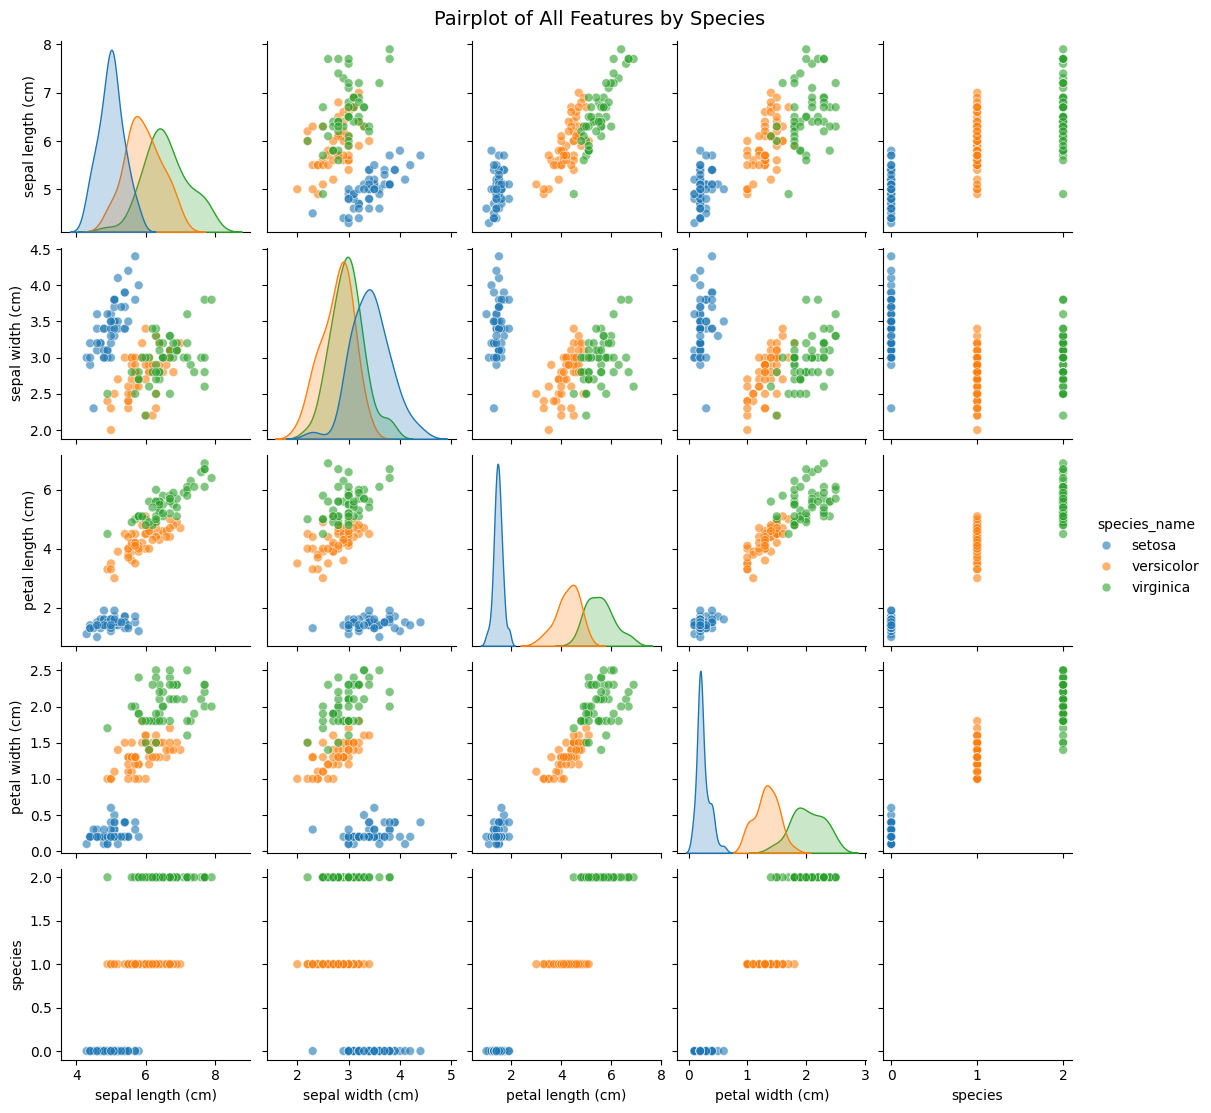

In [27]:
# YOUR CODE HERE
sns.pairplot(df, hue='species_name', diag_kind='kde', height=2.2,
             plot_kws={'alpha': 0.6, 's': 40})
plt.suptitle('Pairplot of All Features by Species', y=1.01, fontsize=14)
plt.show()


### Theory: Train/Test Split and Feature Scaling

Before training any model, we must:

**1. Split the data** into training and test sets:
- We train on one portion and evaluate on another → honest estimate of generalization
- Common splits: 70/30 or 80/20
- Use **stratified splitting** to maintain class proportions

**2. Scale the features** using `StandardScaler`:

$$z = \frac{x - \mu}{\sigma}$$

This transforms each feature to have **mean = 0** and **std = 1**.

> ⚠️ **Why scale?** Both KNN and SVM are **distance-based** algorithms. Without scaling, features with larger ranges dominate the distance computation.

> ⚠️ **Important**: Always `fit` the scaler on the **training data only**, then `transform` both training and test data. This prevents **data leakage**.

### ✏️ Task 0.4: Split and Scale the Data

1. Separate features (`X`) and target (`y`) from the DataFrame
2. Split into **70% training** and **30% test**, with `random_state=42` and `stratify=y`
3. Apply `StandardScaler`: **fit on training data**, transform both training and test
4. Print the number of samples in each set
5. Print feature means and stds after scaling to verify they are ≈ 0 and ≈ 1

In [26]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X = df[iris.feature_names].values
y = df['species'].values

# Split: 70% train, 30% test, stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set:     {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nBefore scaling - Feature means: {X_train.mean(axis=0).round(2)}")
print(f"After scaling  - Feature means: {X_train_scaled.mean(axis=0).round(2)}")
print(f"After scaling  - Feature stds:  {X_train_scaled.std(axis=0).round(2)}")

Training set: 105 samples
Test set:     45 samples

Before scaling - Feature means: [5.87 3.06 3.78 1.21]
After scaling  - Feature means: [ 0. -0. -0. -0.]
After scaling  - Feature stds:  [1. 1. 1. 1.]


### ✏️ Task 0.5: Visualize Scaled vs Unscaled Data

Create a figure with **two box plots side by side**:

1. **Left**: Box plot of the **unscaled** training features
2. **Right**: Box plot of the **scaled** training features

> This visualization should make it clear why scaling matters — the unscaled features have very different ranges.

C:\Users\s4im0\AppData\Local\Temp\ipykernel_16964\2932907688.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X_train, labels=[f.replace(' (cm)', '') for f in iris.feature_names])
C:\Users\s4im0\AppData\Local\Temp\ipykernel_16964\2932907688.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_train_scaled, labels=[f.replace(' (cm)', '') for f in iris.feature_names])


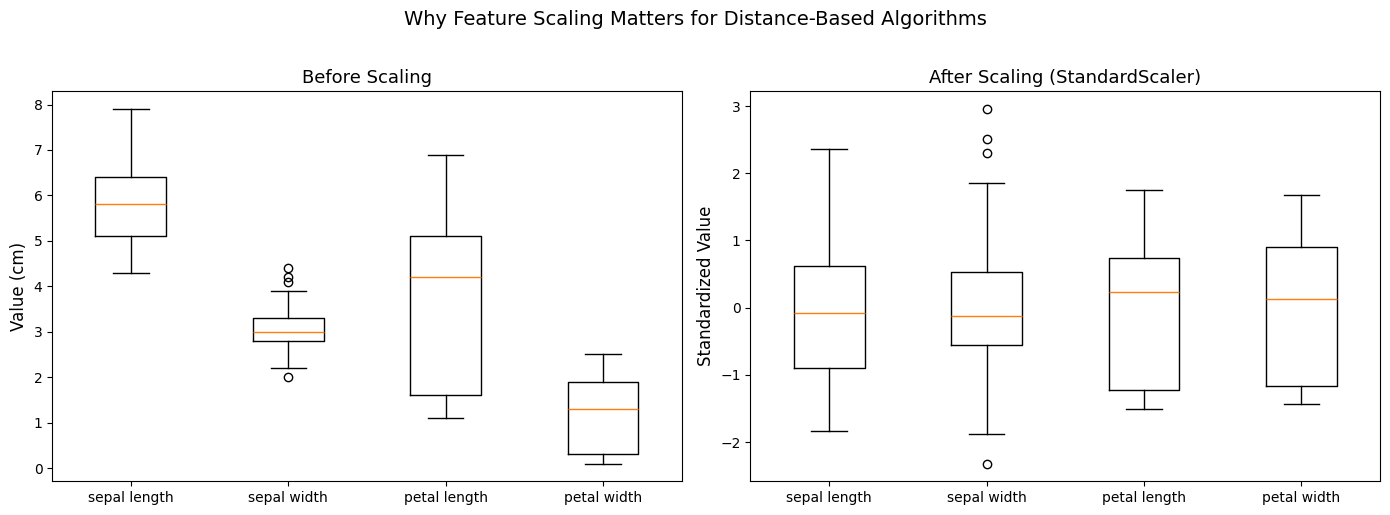

In [28]:
# YOUR CODE HERE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(X_train, labels=[f.replace(' (cm)', '') for f in iris.feature_names])
axes[0].set_title('Before Scaling', fontsize=13)
axes[0].set_ylabel('Value (cm)', fontsize=12)

axes[1].boxplot(X_train_scaled, labels=[f.replace(' (cm)', '') for f in iris.feature_names])
axes[1].set_title('After Scaling (StandardScaler)', fontsize=13)
axes[1].set_ylabel('Standardized Value', fontsize=12)

plt.suptitle('Why Feature Scaling Matters for Distance-Based Algorithms', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()



---

## 🔵 Part 1: K-Nearest Neighbors (KNN)

### Theory

**K-Nearest Neighbors** is one of the simplest and most intuitive machine learning algorithms. It is a **lazy learner**: it does not build a model during training — it stores the entire training set and computes predictions at test time.

**Algorithm:**

```
1. Choose a value for K (number of neighbors)
2. For a new point, compute the distance to every training point
3. Select the K nearest training points
4. Take a majority vote among those K neighbors
5. Assign the winning class
```

**Distance metric** (Euclidean distance):

$$d(p, q) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}$$

**The role of K — the bias-variance tradeoff:**

| K value | Behavior | Risk |
|---------|----------|------|
| Small K (e.g., 1) | Highly sensitive to individual points | **Overfitting** (high variance) |
| Large K (e.g., 100) | Very smooth boundaries | **Underfitting** (high bias) |
| $K \approx \sqrt{n}$ | Common starting heuristic | Balance — but always experiment |

> ⚠️ Because KNN uses distances, **feature scaling is essential**.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/440px-KnnClassification.svg.png" width="300">

*KNN classification: the green dot is classified based on its neighbors (Wikimedia Commons)*

### ✏️ Task 1.1: Train a KNN Classifier

1. Import `KNeighborsClassifier` from `sklearn.neighbors`
2. Create a KNN model with `n_neighbors=5`
3. Fit it on the **scaled** training data
4. Predict on the **scaled** test data
5. Compute and print the accuracy using `accuracy_score` from `sklearn.metrics`

In [30]:
# YOUR CODE HERE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN with K=5
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN (K=10) Accuracy: {acc:.4f}")
print(f"Correct predictions: {(y_test == y_pred_knn).sum()} out of {len(y_test)}")





KNN (K=10) Accuracy: 0.9333
Correct predictions: 42 out of 45


### ✏️ Task 1.2: Find the Best K

1. Try all values of K from **1 to 30**
2. For each K, train a KNN model and compute the test accuracy
3. **Plot** accuracy vs K (line plot with markers)
4. Add a horizontal dashed red line at the best accuracy value
5. Print the best K and its accuracy

> **Hint**: Use a `for` loop and store accuracies in a list.

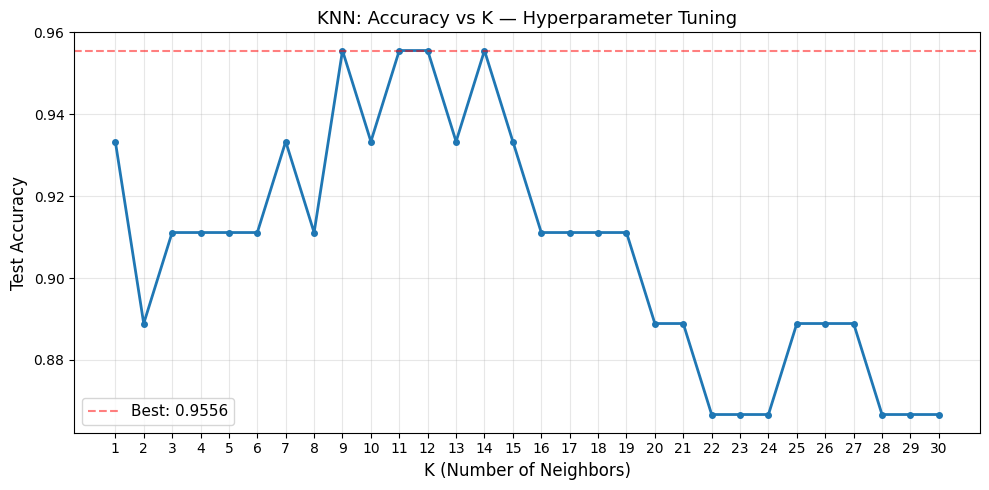

Best K: 9 with accuracy: 0.9556


In [31]:
# YOUR CODE HERE

# Find the best K
k_range = range(1, 31)
accuracies = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn_temp.predict(X_test_scaled))
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', markersize=4, linewidth=2)
plt.xlabel('K (Number of Neighbors)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('KNN: Accuracy vs K — Hyperparameter Tuning', fontsize=13)
plt.xticks(range(1, 31))
plt.grid(True, alpha=0.3)
plt.axhline(y=max(accuracies), color='r', linestyle='--', alpha=0.5, label=f'Best: {max(accuracies):.4f}')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

best_k = list(k_range)[np.argmax(accuracies)]
print(f"Best K: {best_k} with accuracy: {max(accuracies):.4f}")

### ✏️ Task 1.3: Visualize KNN Decision Boundary (2D)

Using only the **petal features** (columns 2 and 3 of the scaled data):

1. Train KNN (K=5) on the 2D petal features
2. Create a **mesh grid** with `np.meshgrid` and step size 0.02
3. Predict the class for every point in the mesh
4. Plot the decision regions using `contourf` and overlay the training points

> This gives a visual intuition of how KNN partitions the feature space.

**Hint for mesh grid:**
```python
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
```

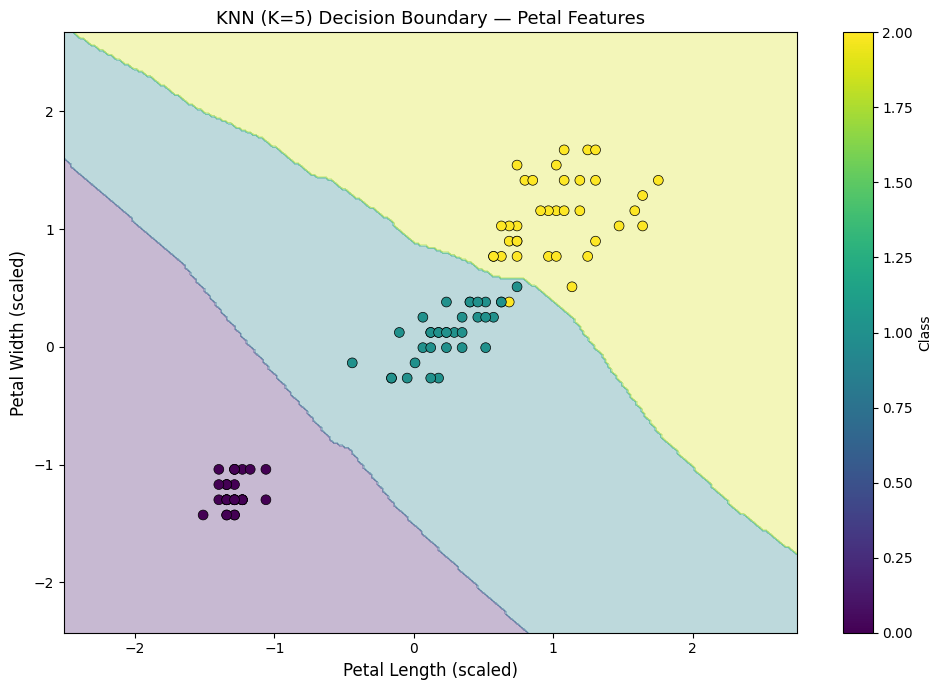

In [ ]:
# YOUR CODE HERE

# KNN decision boundary visualization (2D petal features)
knn_2d = KNeighborsClassifier(n_neighbors=5) # <- try change the n. of neighbors
knn_2d.fit(X_train_scaled[:, 2:4], y_train)

h = 0.02
x_min, x_max = X_train_scaled[:, 2].min() - 1, X_train_scaled[:, 2].max() + 1
y_min, y_max = X_train_scaled[:, 3].min() - 1, X_train_scaled[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train_scaled[:, 2], X_train_scaled[:, 3], c=y_train, cmap='viridis',
            edgecolors='k', linewidths=0.5, s=50)
plt.xlabel('Petal Length (scaled)', fontsize=12)
plt.ylabel('Petal Width (scaled)', fontsize=12)
plt.title('KNN (K=5) Decision Boundary — Petal Features', fontsize=13)
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()

---

## 🟢 Part 2: Support Vector Machine (SVM)

### Theory

**Support Vector Machines** find the hyperplane that separates classes with the **maximum margin** — the largest possible gap between the decision boundary and the closest training points.

**Key Concepts:**

| Concept | Description |
|---------|-------------|
| **Support Vectors** | Training points closest to the boundary — only these define the model |
| **Margin** | Distance between the boundary and the nearest support vectors |
| **Hyperplane** | The decision surface ($w \cdot x + b = 0$ in the linear case) |
| **Kernel Trick** | Implicitly maps data to higher dimensions for non-linear separation |

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png" width="320">

*SVM maximizes the margin between classes. Support vectors are circled. (Wikimedia Commons)*

**Common Kernels:**

| Kernel | Formula | Best for |
|--------|---------|----------|
| **Linear** | $K(x_i, x_j) = x_i \cdot x_j$ | Linearly separable data |
| **RBF** (Gaussian) | $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$ | Non-linear boundaries (most common) |
| **Polynomial** | $K(x_i, x_j) = (\gamma \, x_i \cdot x_j + r)^d$ | Polynomial decision surfaces |

**Key Hyperparameters:**

| Parameter | Low value | High value |
|-----------|-----------|------------|
| **C** (regularization) | Smooth boundary → risk underfitting | Complex boundary → risk overfitting |
| **gamma** (RBF/poly) | Long-range influence → risk underfitting | Short-range influence → risk overfitting |

### ✏️ Task 2.1: Train SVMs with Different Kernels

1. Import `SVC` from `sklearn.svm`
2. Train three SVM models with kernels: `'linear'`, `'rbf'`, `'poly'` (use `random_state=42`)
3. Predict on the test set with each model
4. Print the accuracy of each model

> **Question**: Which kernel performs best? Is the difference large?

In [33]:
# YOUR CODE HERE

from sklearn.svm import SVC

# Train SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
svm_results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    svm_results[kernel] = {'model': svm, 'accuracy': acc, 'predictions': y_pred}
    print(f"SVM ({kernel:6s} kernel) Accuracy: {acc:.4f}")

print(f"\nBest kernel: {max(svm_results, key=lambda k: svm_results[k]['accuracy'])}")

SVM (linear kernel) Accuracy: 0.9111
SVM (rbf    kernel) Accuracy: 0.9333
SVM (poly   kernel) Accuracy: 0.8667

Best kernel: rbf


### ✏️ Task 2.2: Visualize Support Vectors

Using only the **petal features** (columns 2 and 3 of the scaled data) for visualization:

1. Train an SVM with `kernel='rbf'` on the 2D petal features
2. Create a scatter plot of the training data colored by class
3. **Highlight the support vectors** with larger, hollow red circles (`facecolors='none'`, `edgecolors='red'`)
4. Print the total number of support vectors and the count per class

> **Hint**: After fitting, access `model.support_vectors_` and `model.n_support_`.

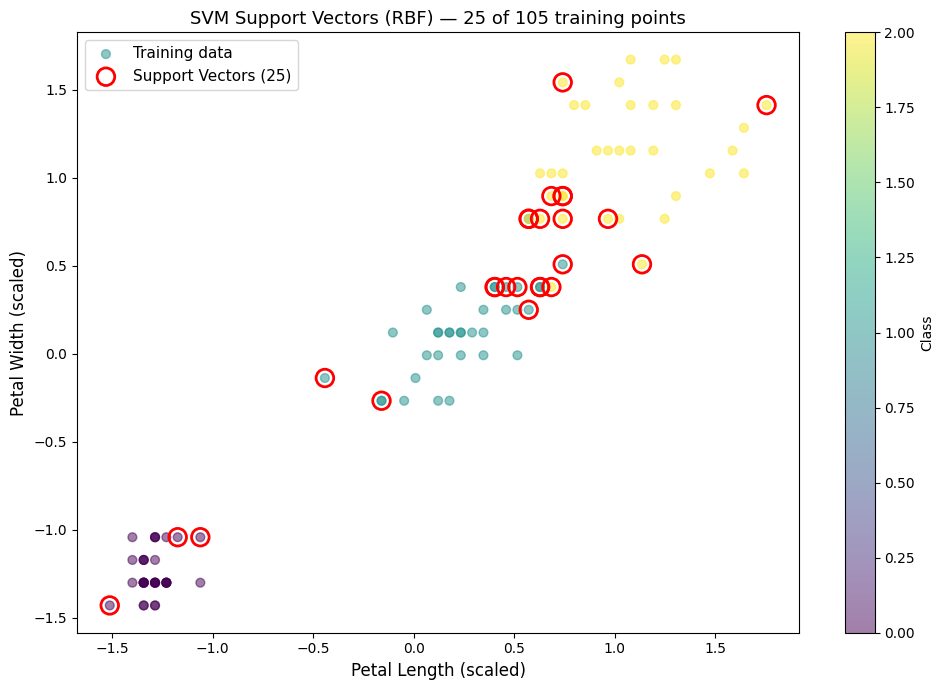

Support vectors per class: [ 3 11 11]


In [34]:
# YOUR CODE HERE

# Visualize support vectors (2D petal features)
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_scaled[:, 2:4], y_train)

fig, ax = plt.subplots(figsize=(10, 7))

scatter = ax.scatter(X_train_scaled[:, 2], X_train_scaled[:, 3],
                     c=y_train, cmap='viridis', alpha=0.5, s=40, label='Training data')
sv = svm_rbf_2d.support_vectors_
ax.scatter(sv[:, 0], sv[:, 1], s=160, facecolors='none', edgecolors='red',
           linewidths=2, label=f'Support Vectors ({len(sv)})')

ax.set_xlabel('Petal Length (scaled)', fontsize=12)
ax.set_ylabel('Petal Width (scaled)', fontsize=12)
ax.set_title(f'SVM Support Vectors (RBF) — {len(sv)} of {len(X_train_scaled)} training points', fontsize=13)
ax.legend(fontsize=11)
plt.colorbar(scatter, label='Class')
plt.tight_layout()
plt.show()

print(f"Support vectors per class: {svm_rbf_2d.n_support_}")

### ✏️ Task 2.3: Effect of the C Parameter

Explore how the regularization parameter C affects the decision boundary:

1. Use C values: `[0.01, 0.1, 1, 10, 100]`
2. For each C, train an SVM (`kernel='rbf'`) on the 2D petal features
3. Plot the **decision boundary** using `contourf` on a mesh grid
4. Overlay the training points
5. In each subplot title, show: C value, test accuracy, number of support vectors

> Create a figure with **5 subplots in a row** (`1 x 5`), one per C value.

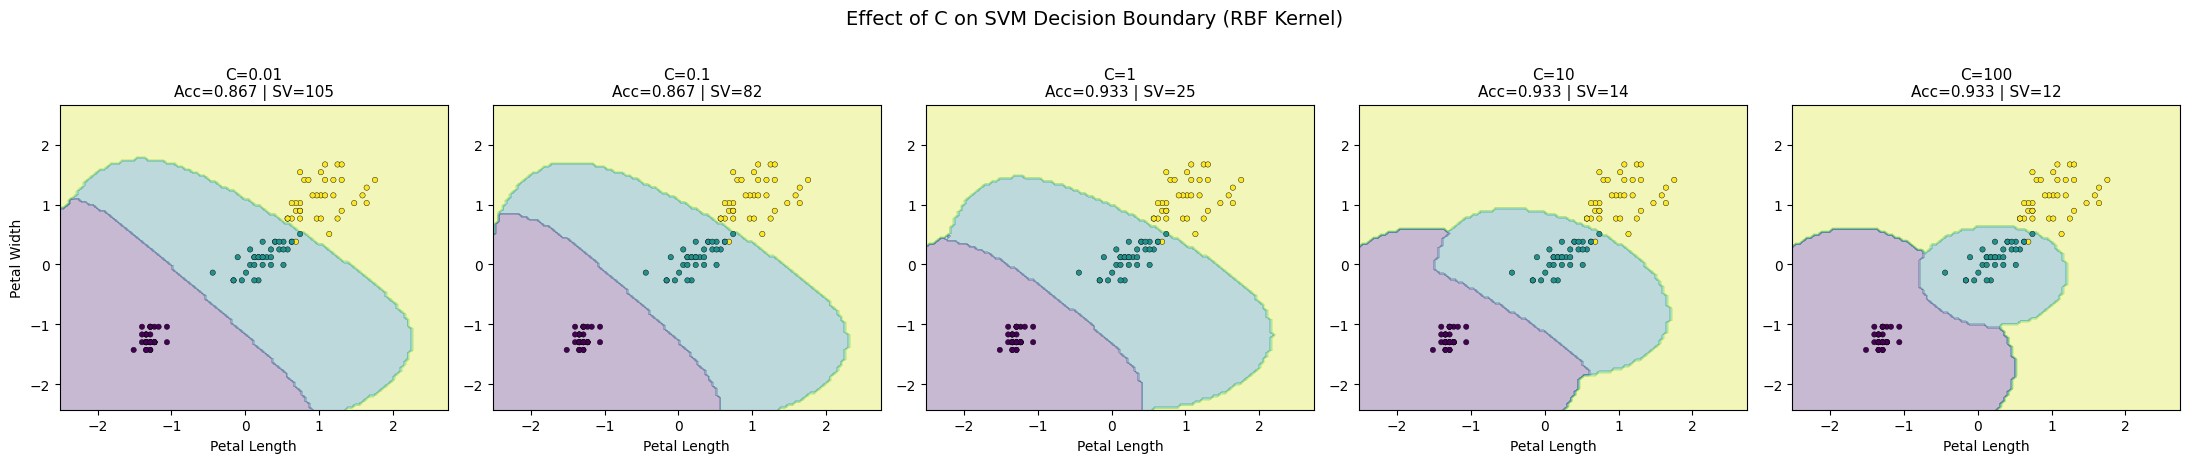

In [36]:
# YOUR CODE HERE

# Effect of C parameter
C_values = [0.01, 0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(22, 4.5))

for i, C in enumerate(C_values):
    svm_temp = SVC(kernel='rbf', C=C, random_state=42)
    svm_temp.fit(X_train_scaled[:, 2:4], y_train)

    h = 0.05
    x_min, x_max = X_train_scaled[:, 2].min() - 1, X_train_scaled[:, 2].max() + 1
    y_min, y_max = X_train_scaled[:, 3].min() - 1, X_train_scaled[:, 3].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm_temp.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    axes[i].scatter(X_train_scaled[:, 2], X_train_scaled[:, 3], c=y_train,
                    cmap='viridis', s=15, edgecolors='k', linewidths=0.3)
    acc_full = accuracy_score(y_test, SVC(kernel='rbf', C=C, random_state=42).fit(X_train_scaled, y_train).predict(X_test_scaled))
    axes[i].set_title(f'C={C}\nAcc={acc_full:.3f} | SV={len(svm_temp.support_vectors_)}', fontsize=11)
    axes[i].set_xlabel('Petal Length')
    if i == 0:
        axes[i].set_ylabel('Petal Width')

plt.suptitle('Effect of C on SVM Decision Boundary (RBF Kernel)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### ✏️ Task 2.4: Visualize SVM Decision Boundary (2D)

Using the **petal features** and the best-performing kernel:

1. Train SVM on 2D petal features
2. Plot the decision boundary using `contourf` (same mesh technique as Task 1.3)
3. Overlay training points and highlight support vectors

> Compare this boundary visually with the KNN boundary from Task 1.3. Which looks smoother?

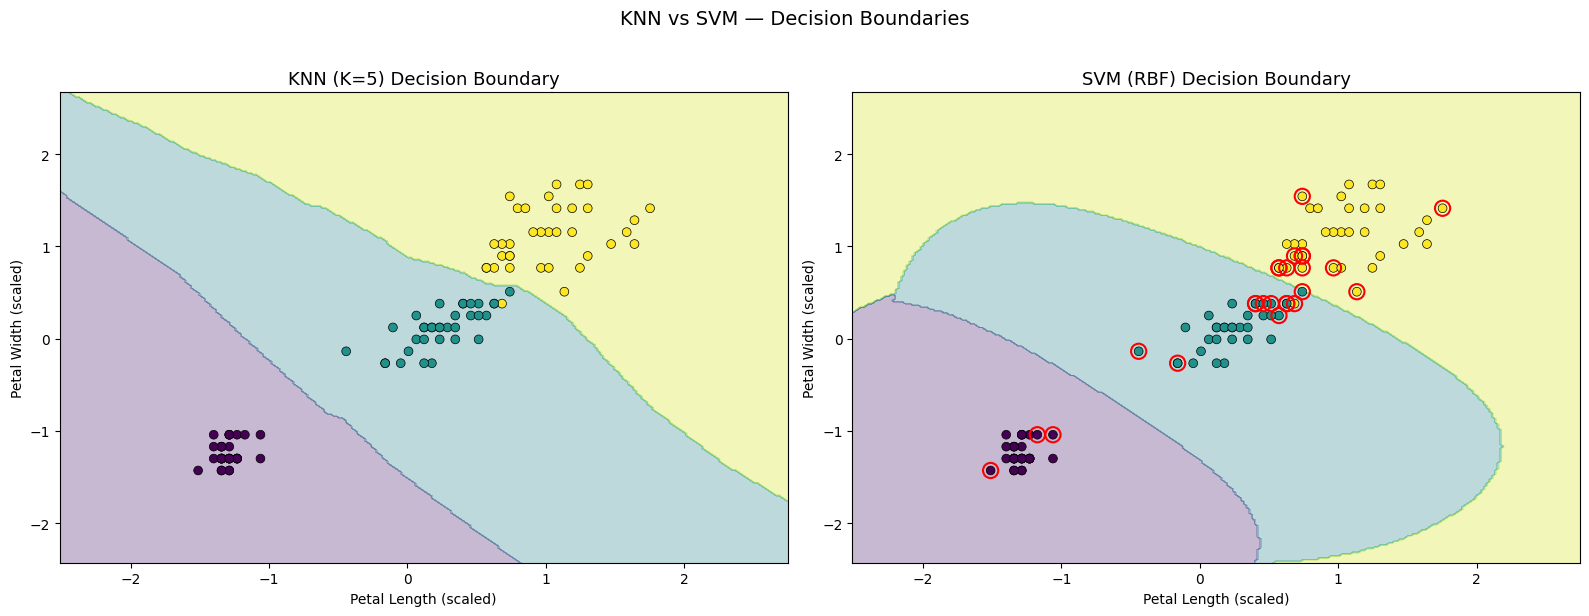

In [37]:
# YOUR CODE HERE

# SVM decision boundary (2D) — compare with KNN
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

h = 0.02
x_min, x_max = X_train_scaled[:, 2].min() - 1, X_train_scaled[:, 2].max() + 1
y_min, y_max = X_train_scaled[:, 3].min() - 1, X_train_scaled[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# KNN boundary
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_scaled[:, 2:4], y_train)
Z_knn = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes[0].contourf(xx, yy, Z_knn, alpha=0.3, cmap='viridis')
axes[0].scatter(X_train_scaled[:, 2], X_train_scaled[:, 3], c=y_train,
                cmap='viridis', edgecolors='k', linewidths=0.5, s=40)
axes[0].set_title('KNN (K=5) Decision Boundary', fontsize=13)
axes[0].set_xlabel('Petal Length (scaled)')
axes[0].set_ylabel('Petal Width (scaled)')

# SVM boundary
svm_2d = SVC(kernel='rbf', random_state=42)
svm_2d.fit(X_train_scaled[:, 2:4], y_train)
Z_svm = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes[1].contourf(xx, yy, Z_svm, alpha=0.3, cmap='viridis')
axes[1].scatter(X_train_scaled[:, 2], X_train_scaled[:, 3], c=y_train,
                cmap='viridis', edgecolors='k', linewidths=0.5, s=40)
sv = svm_2d.support_vectors_
axes[1].scatter(sv[:, 0], sv[:, 1], s=120, facecolors='none', edgecolors='red', linewidths=1.5)
axes[1].set_title('SVM (RBF) Decision Boundary', fontsize=13)
axes[1].set_xlabel('Petal Length (scaled)')
axes[1].set_ylabel('Petal Width (scaled)')

plt.suptitle('KNN vs SVM — Decision Boundaries', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

---

## 🟡 Part 3: K-Means Clustering

### Theory

Now we switch from **supervised** to **unsupervised** learning. K-Means partitions data into K clusters **without using labels**.

**Algorithm:**

```
1. INITIALIZE: Place K centroids randomly
2. ASSIGN:     Assign each point to the nearest centroid
3. UPDATE:     Move each centroid to the mean of its assigned points
4. REPEAT:     Steps 2-3 until convergence (centroids stop moving)
```

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif" width="350">

*K-Means convergence animation: centroids move iteratively until stable (Wikimedia Commons)*

**Properties:**
- You must specify **K** in advance
- Sensitive to initialization → use `n_init=10` (run multiple times, keep best)
- Assumes **spherical, equally-sized** clusters
- **Feature scaling** is important (distance-based)

**How to choose K:**

| Method | How it works | What to look for |
|--------|-------------|-----------------|
| **Elbow Method** | Plot inertia (within-cluster sum of squares) vs K | The "elbow" where inertia stops dropping sharply |
| **Silhouette Score** | Measures cluster cohesion vs separation `[-1, 1]` | The K with the highest score |

> ⚠️ Always combine algorithmic criteria with **domain knowledge**.

### ✏️ Task 3.1: Elbow Method

1. Import `KMeans` from `sklearn.cluster`
2. Try K values from **1 to 10**
3. For each K, train K-Means (with `random_state=42`, `n_init=10`) and record `inertia_`
4. **Plot** inertia vs K with markers
5. Annotate the elbow point on the plot

> **Question**: Where is the elbow? Does it match the true number of species?

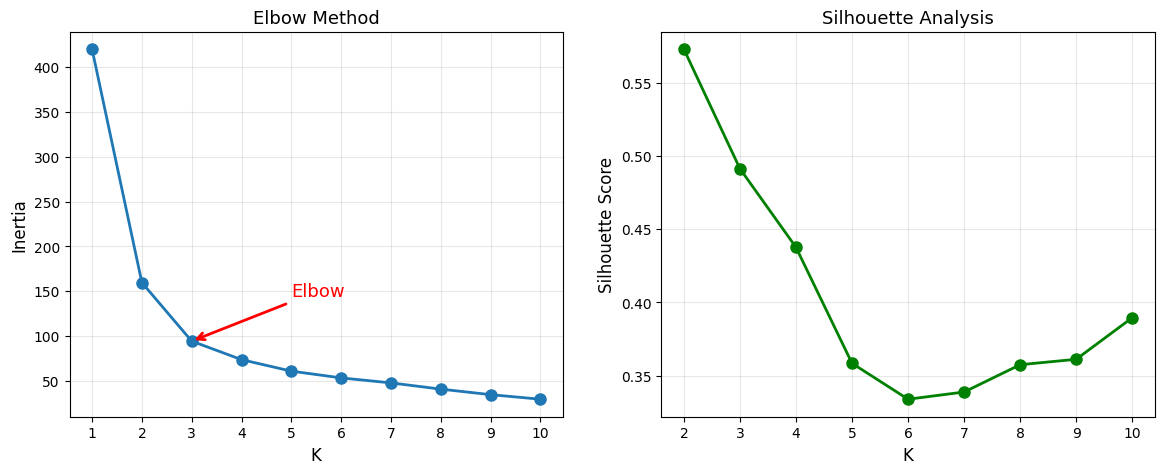

In [38]:
# YOUR CODE HERE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow + Silhouette side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_train_scaled)
    inertias.append(km.inertia_)

axes[0].plot(K_range, inertias, marker='o', markersize=8, linewidth=2)
axes[0].set_xlabel('K', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=13)
axes[0].set_xticks(range(1, 11))
axes[0].grid(True, alpha=0.3)
axes[0].annotate('Elbow', xy=(3, inertias[2]), xytext=(5, inertias[2]+50),
                 arrowprops=dict(arrowstyle='->', color='red', lw=2), fontsize=13, color='red')

# Silhouette
sil_scores = []
K_sil = range(2, 11)
for k in K_sil:
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_train_scaled)
    sil_scores.append(silhouette_score(X_train_scaled, labels))

axes[1].plot(K_sil, sil_scores, marker='o', markersize=8, linewidth=2, color='green')
axes[1].set_xlabel('K', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=13)
axes[1].set_xticks(range(2, 11))
axes[1].grid(True, alpha=0.3)


### ✏️ Task 3.2: Silhouette Score Analysis

1. Import `silhouette_score` from `sklearn.metrics`
2. For K values from **2 to 10**, compute the silhouette score
3. **Plot** silhouette score vs K
4. Print all scores and identify the best K

> **Question**: Does the silhouette method agree with the elbow method? If not, why?

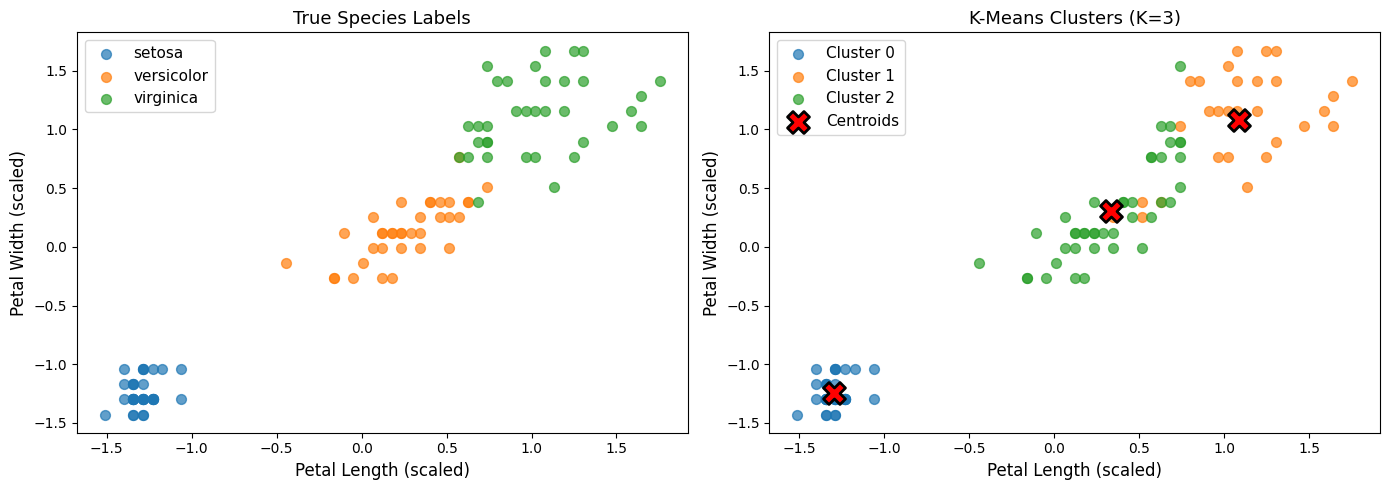


Cross-tabulation: True Species vs K-Means Clusters
Cluster      0   1   2
setosa      35   0   0
versicolor   0   4  31
virginica    0  25  10


In [ ]:
# YOUR CODE HERE

# K-Means with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Compare: true vs clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for sid, name in enumerate(iris.target_names):
    mask = y_train == sid
    axes[0].scatter(X_train_scaled[mask, 2], X_train_scaled[mask, 3], label=name, alpha=0.7, s=50)
axes[0].set_title('True Species Labels', fontsize=13)
axes[0].set_xlabel('Petal Length (scaled)', fontsize=12)
axes[0].set_ylabel('Petal Width (scaled)', fontsize=12)
axes[0].legend(fontsize=11)

for cid in range(3):
    mask = cluster_labels == cid
    axes[1].scatter(X_train_scaled[mask, 2], X_train_scaled[mask, 3], label=f'Cluster {cid}', alpha=0.7, s=50)
centroids = kmeans.cluster_centers_
axes[1].scatter(centroids[:, 2], centroids[:, 3], c='red', marker='X', s=250,
                edgecolors='black', linewidths=2, label='Centroids', zorder=5)
axes[1].set_title('K-Means Clusters (K=3)', fontsize=13)
axes[1].set_xlabel('Petal Length (scaled)', fontsize=12)
axes[1].set_ylabel('Petal Width (scaled)', fontsize=12)
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()

ct = pd.crosstab(y_train, cluster_labels, rownames=['True Species'], colnames=['Cluster'])
ct.index = iris.target_names
print("\nCross-tabulation: True Species vs K-Means Clusters")
print(ct)

### ✏️ Task 3.3: Compare Clusters with True Labels

1. Train K-Means with **K=3** on the scaled training data
2. Create a figure with **two scatter plots side by side** (using petal features):
   - **Left**: True species labels
   - **Right**: K-Means cluster assignments, with centroids plotted as large red **X** markers
3. Create a **cross-tabulation** (`pd.crosstab`) comparing true labels with cluster assignments
4. Print and analyze the table

> **Question**: How well did K-Means recover the true species grouping?

In [15]:
# YOUR CODE HERE

### ✏️ Task 3.4: Visualize Cluster Silhouette per Sample

Using `sklearn.metrics.silhouette_samples`, create a **silhouette plot** for K=3:

1. Compute per-sample silhouette values
2. For each cluster, plot horizontal bars sorted by silhouette value
3. Add a vertical dashed line at the mean silhouette score
4. Color each cluster differently

> This plot reveals whether all clusters are well-formed or if some contain poorly-assigned points.

**Hint:**
```python
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(X_train_scaled, cluster_labels)
```

In [16]:
# YOUR CODE HERE

---

## 📊 Part 4: Evaluation Metrics

### Theory: Classification Metrics (Supervised)

| Metric | Formula | What it answers |
|--------|---------|----------------|
| **Precision** | $\frac{TP}{TP + FP}$ | Of predicted positives, how many are actually positive? |
| **Recall** | $\frac{TP}{TP + FN}$ | Of actual positives, how many did we find? |
| **F1-Score** | $2 \cdot \frac{P \cdot R}{P + R}$ | Harmonic mean — balances precision and recall |
| **Accuracy** | $\frac{TP + TN}{Total}$ | Overall fraction of correct predictions |

**Averaging strategies for multi-class:**
- **Macro**: Average across classes (treats all classes equally)
- **Weighted**: Weighted by support (accounts for imbalance)

**Confusion Matrix**: An $n \times n$ table where rows = true classes, columns = predictions. Diagonal = correct, off-diagonal = errors.

### Theory: Clustering Metrics (Unsupervised)

| Metric | Range | What it measures |
|--------|-------|-----------------|
| **Silhouette Score** | $[-1, 1]$ | How similar a point is to its own cluster vs other clusters |
| **Adjusted Rand Index** | $[-1, 1]$ | Agreement between cluster labels and true labels (1 = perfect) |
| **Inertia** | $[0, \infty)$ | Within-cluster sum of squares (lower = tighter clusters) |

### ✏️ Task 4.1: Classification Reports

1. Import `classification_report` from `sklearn.metrics`
2. Print the **classification report** for KNN (K=5) predictions
3. Print the **classification report** for the best SVM model
4. Use `target_names=iris.target_names` for readable output

> **Question**: Which class has the highest F1-score? Which has the lowest? Why?

In [17]:
# YOUR CODE HERE

### ✏️ Task 4.2: Confusion Matrices

1. Import `ConfusionMatrixDisplay` from `sklearn.metrics`
2. Create a figure with **2 confusion matrices side by side**:
   - Left: KNN predictions (`cmap='Blues'`)
   - Right: Best SVM predictions (`cmap='Greens'`)
3. Use `display_labels=iris.target_names`

> **Question**: Which species pair causes the most confusion? Is this consistent with the scatter plots?

In [18]:
# YOUR CODE HERE

### ✏️ Task 4.3: Clustering Evaluation

Evaluate K-Means clustering (K=3):

1. Compute **Silhouette Score** on the training data
2. Compute **Adjusted Rand Index** comparing `y_train` with cluster labels
3. Report **Inertia** from `kmeans.inertia_`
4. Print all three metrics with a brief interpretation of each

In [19]:
# YOUR CODE HERE

### ✏️ Task 4.4: Precision-Recall Bar Chart

Create a **grouped bar chart** comparing precision and recall for each class, for both KNN and SVM:

1. Extract per-class precision and recall from the classification reports (use `classification_report(..., output_dict=True)`)
2. Plot grouped bars: 3 classes × 2 metrics × 2 models
3. Add a legend and axis labels

> This visualization makes it easier to spot which classes are harder for each model.

In [20]:
# YOUR CODE HERE

---

## 🏆 Part 5: Model Comparison

### ✏️ Task 5.1: Build a Comparison Table

Create a `pandas.DataFrame` comparing all supervised models with these columns:
- Model name
- Accuracy
- Macro F1-Score

Sort by accuracy (descending) and display the table.

**Models to include**: KNN (K=5), SVM (Linear), SVM (RBF), SVM (Poly)

**Hint**: Use `f1_score(y_test, y_pred, average='macro')` from `sklearn.metrics`.

In [21]:
# YOUR CODE HERE

### ✏️ Task 5.2: Comparison Bar Chart

Create a **grouped bar chart** comparing accuracy and macro F1-score across all 4 models.

> Visualizing the comparison table makes differences immediately obvious.

In [22]:
# YOUR CODE HERE

### ✏️ Task 5.3: Discussion

Answer the following questions (in a markdown cell or as print statements):

1. Which algorithm performed best on this dataset? Was the difference significant?
2. In what scenarios would you prefer **KNN** over **SVM**, and vice versa?
3. How well did **K-Means** recover the true clusters without labels?
4. Why is **accuracy alone** not sufficient to evaluate a classifier?
5. What would change if the dataset were **highly imbalanced** (e.g., 90% setosa)?

In [23]:
# YOUR CODE HERE